In [1]:
pip install tensorflow keras numpy opencv-python


In [2]:
#!curl https://course-v3.fast.ai/setup/colab | bash  ## IT FAILS
!mkdir -p /root/.torch/models
!mkdir -p /root/.fastai/data
!n -s /root/.torch/models /content
!ln -s /root/.fastai/data /content
!rm -rf /content/sample_data/

/bin/bash: line 1: n: command not found


In [3]:
pip install fastai --upgrade > /dev/null

In [4]:
pip install fastai --upgrade


In [5]:
import sys
import platform
print("Python Version:", sys.version)
print("Platform:", platform.platform())


Python Version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Platform: Linux-6.1.85+-x86_64-with-glibc2.35


In [6]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.3
aiohttp                            3.11.2
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.6
astropy-iers-data                  0.2024.11.18.0.35.2
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread           

In [7]:
pip install fastai --upgrade


In [8]:
pip install fastai==2.4


INFO: pip is looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torch<1.10,>=1.7.0 (from fastai) (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1)
ERROR: No matching distribution found for torch<1.10,>=1.7.0


In [9]:
pip install fastai==1.0.61


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 8.7 MB/s eta 0:00:00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19173 sha256=3a989eac1598292f65bad42d41ee3c41ad072a02ea7585d94ec8eecd82ead229
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea858b9b34819fbf9e
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.18
    Uninstalling fastai-2.7.18:
      Successfully uninstalled fastai-2.7.18


In [10]:
from fastai.utils.collect_env import show_install

# Display detailed environment information
show_install(True)




```text
=== Software === 
python        : 3.10.12
fastai        : 1.0.61
fastprogress  : 1.0.3
torch         : 2.5.1+cu121
nvidia driver : 535.104
torch cuda    : 12.1 / is available
torch cudnn   : 90100 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 15360MB | Tesla T4

=== Environment === 
platform      : Linux-6.1.85+-x86_64-with-glibc2.35
distro        : Ubuntu 22.04 Jammy Jellyfish
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : /content
/env/python
/usr/lib/python310.zip
/usr/lib/python3.10
/usr/lib/python3.10/lib-dynload

/usr/local/lib/python3.10/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.10/dist-packages/IPython/extensions
/usr/local/lib/python3.10/dist-packages/setuptools/_vendor
/root/.ipython

Sat Nov 30 14:52:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Vers

In [11]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.vision.gan import *

In [12]:
path = untar_data(URLs.PETS)
path_hr = path/'images'
path_lr = path/'crappy'

Create the low-res images by "crappify-ing" the original ones

In [13]:
from fastai.vision import *
from PIL import Image, ImageDraw, ImageFont

class crappifier(object):
    def __init__(self, path_lr, path_hr):
        self.path_lr = path_lr
        self.path_hr = path_hr

    def __call__(self, fn, i):
        dest = self.path_lr/fn.relative_to(self.path_hr)
        dest.parent.mkdir(parents=True, exist_ok=True)
        img = PIL.Image.open(fn)
        targ_sz = resize_to(img, 96, use_min=True)
        img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
        w,h = img.size
        q = random.randint(10,70)
        ImageDraw.Draw(img).text((random.randint(0,w//2),random.randint(0,h//2)), str(q), fill=(255,255,255))
        img.save(dest, quality=q)

In [14]:
il = ImageList.from_folder(path_hr)
il
#parallel(crappify, il.items)
parallel(crappifier(path_lr, path_hr), il.items)

Abyssinian_217.jpg


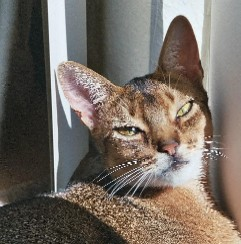

In [15]:
# Pick a random image from the directory
import os, random
from PIL import Image

a=random.choice(os.listdir(path/'images'))
print(a)

file = os.path.join(path/'images',a)
img = Image.open(file)
img



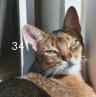

In [16]:
# and its crappified correspondent:
file = os.path.join(path/'crappy',a)
img = Image.open(file)
img

In [17]:
bs,size=32, 128
# bs,size = 24,160
#bs,size = 8,256
arch = models.resnet34

In [18]:
arch = models.resnet34
src = ImageImageList.from_folder(path_lr).split_by_rand_pct(0.1, seed=42)

In [19]:
def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_hr/x.name)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [20]:
pip install --upgrade torch


In [21]:
!pip install --upgrade torch torchvision torchaudio
!pip install --upgrade fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [28]:
data_gen = get_data (bs,size)

In [24]:
!pip install --upgrade fastai

In [26]:
import fastai.vision.transform as tvt
import torch

def _find_coeffs_patched(orig_pts, targ_pts):
    """Find the transformation coefficients for perspective warp."""
    # Convert orig_pts and targ_pts to PyTorch tensors if they are lists
    if isinstance(orig_pts, list):
        orig_pts = torch.tensor(orig_pts, dtype=torch.float32)
    if isinstance(targ_pts, list):
        targ_pts = torch.tensor(targ_pts, dtype=torch.float32)

    # Now orig_pts has a device attribute
    matrix = torch.zeros(8, 8, dtype=torch.float32, device=orig_pts.device)
    for i in range(4):
        matrix[i*2, 0] = orig_pts[i,0]
        matrix[i*2, 1] = orig_pts[i,1]
        matrix[i*2, 2] = 1
        matrix[i*2, 6] = -targ_pts[i,0] * orig_pts[i,0]
        matrix[i*2, 7] = -targ_pts[i,0] * orig_pts[i,1]
        matrix[i*2+1, 3] = orig_pts[i,0]
        matrix[i*2+1, 4] = orig_pts[i,1]
        matrix[i*2+1, 5] = 1
        matrix[i*2+1, 6] = -targ_pts[i,1] * orig_pts[i,0]
        matrix[i*2+1, 7] = -targ_pts[i,1] * orig_pts[i,1]
    b = torch.reshape(targ_pts, (8, 1))

    # Replace torch.solve with torch.linalg.solve
    coeffs = torch.linalg.solve(matrix, b)
    coeffs = coeffs.squeeze()

    return coeffs

# Monkey-patch the _find_coeffs function in fastai.vision.transform
tvt._find_coeffs = _find_coeffs_patched

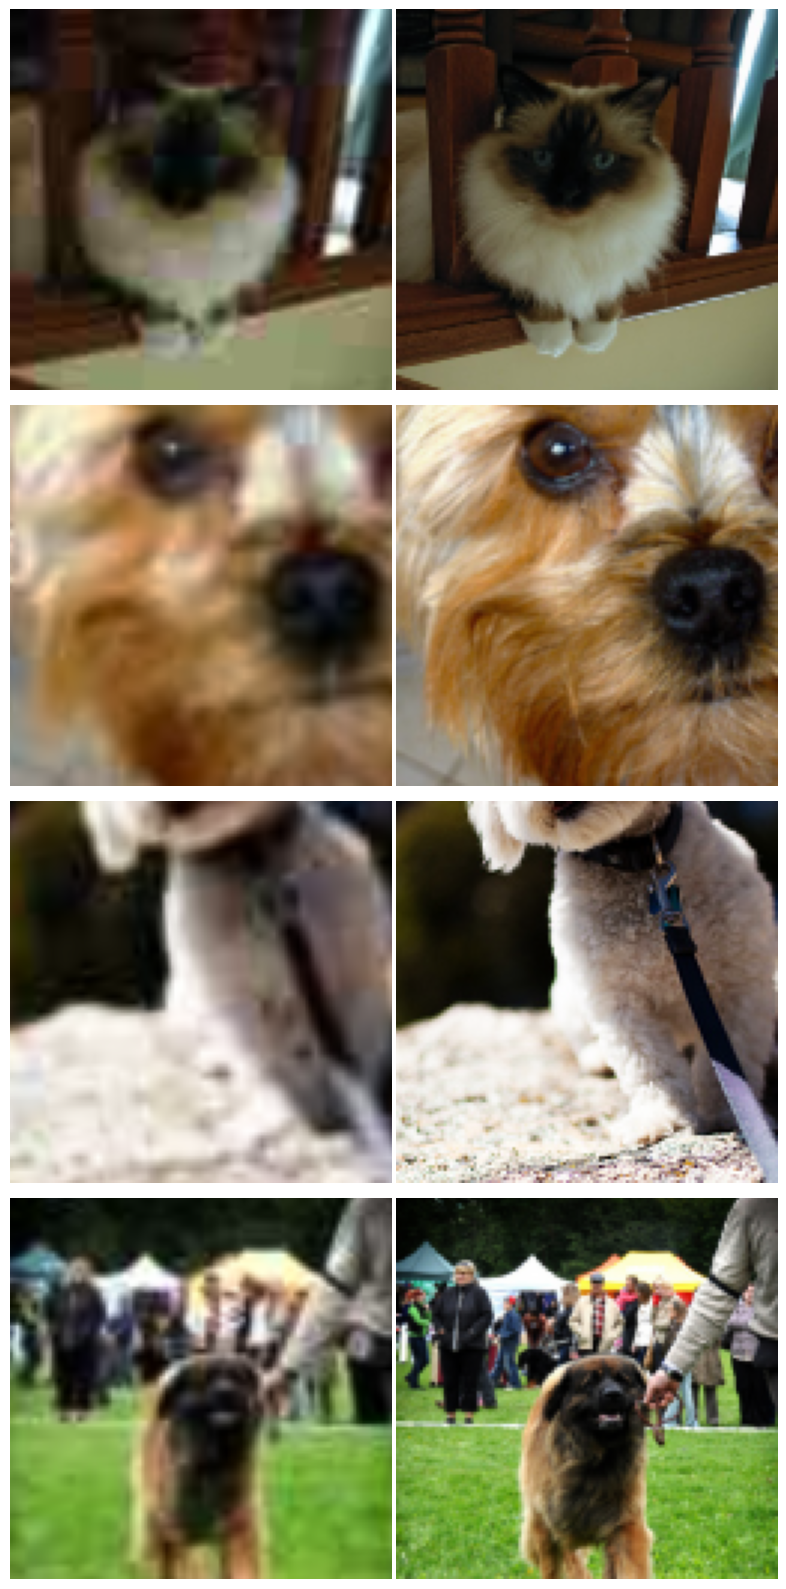

In [29]:
data_gen.show_batch(4)

In [30]:
wd = 1e-3

In [31]:
y_range = (-3.,3.)

Loss Function-MSE Takes 2 vectors;MSELossFlat()

In [32]:
loss_gen = MSELossFlat()

In [33]:
def create_gen_learner():
    return unet_learner(data_gen, arch, wd=wd, blur=True, norm_type=NormType.Weight,
                         self_attention=True, y_range=y_range, loss_func=loss_gen)

Train the modelU-net,pre-trained part is leftside of U

In [34]:
learn_gen = create_gen_learner()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 143MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.para

In [35]:
learn_gen.fit_one_cycle(2, pct_start=0.8)

epoch,train_loss,valid_loss,time
0,0.063776,0.054104,02:50
1,0.053733,0.049284,02:39


Unfreeze and train more

In [36]:
learn_gen.unfreeze()

In [37]:
learn_gen.fit_one_cycle(3, slice(1e-6,1e-3))

epoch,train_loss,valid_loss,time
0,0.051135,0.049078,02:39
1,0.049386,0.047475,02:40
2,0.048364,0.046764,02:35


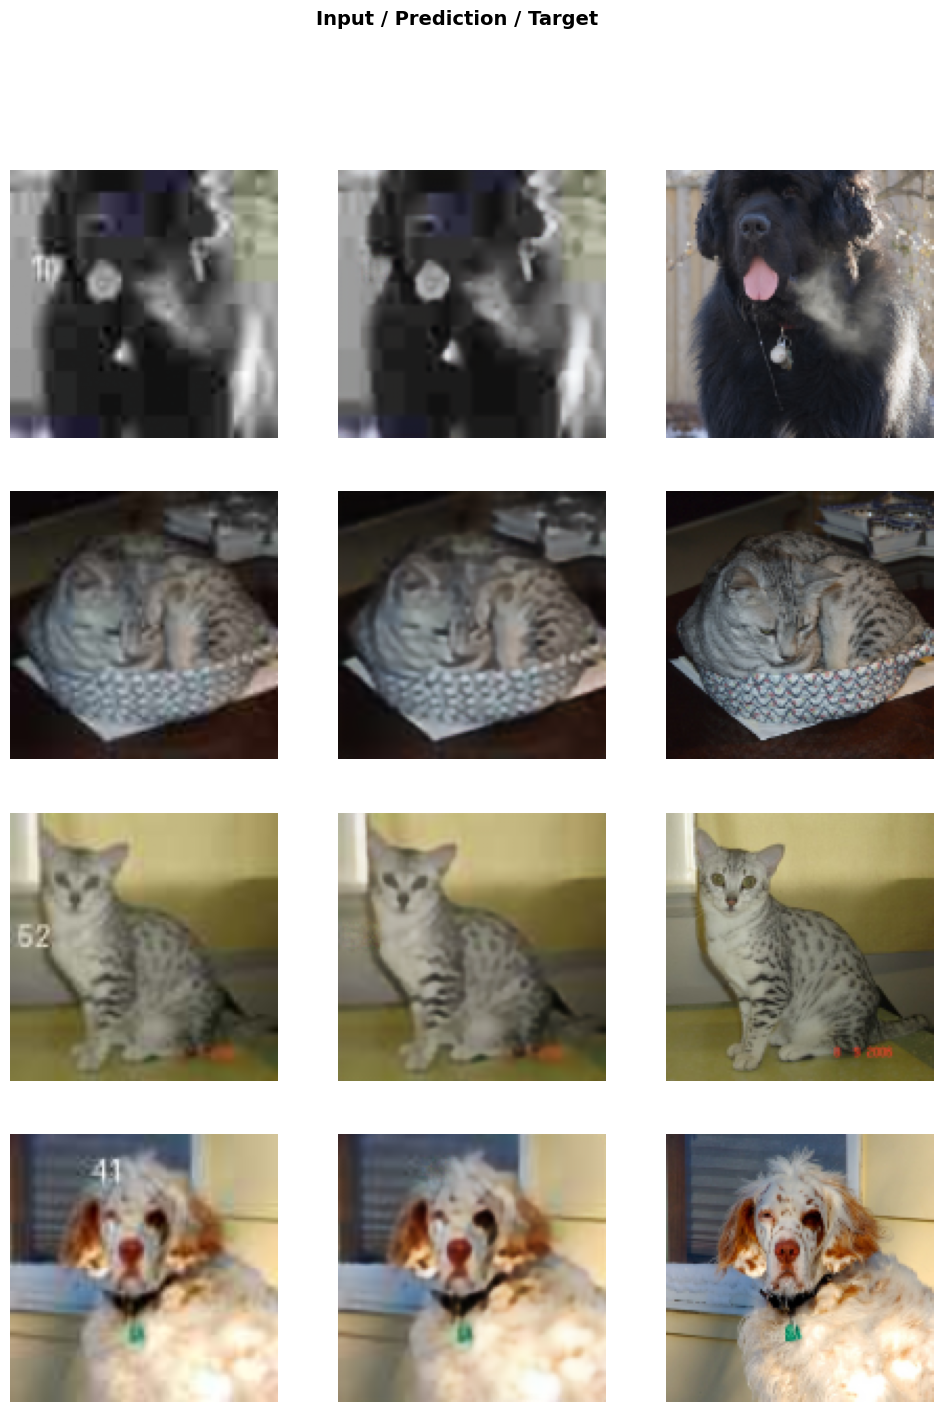

In [38]:
learn_gen.show_results(rows=4)

Results: It's working good by removing the numbers from images but we can improve somewhat

In [39]:
learn_gen.save('gen-pre2')

Save generate images

In [40]:
learn_gen.load('gen-pre2');

/usr/local/lib/python3.10/dist-packages/fastai/basic_train.py:269: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [41]:
name_gen = 'image_gen'
path_gen = path/name_gen

In [42]:
path_gen.mkdir(exist_ok=True)

In [43]:
def save_preds(dl):
    i=0
    names = dl.dataset.items

    for b in dl:
        preds = learn_gen.pred_batch(batch=b, reconstruct=True)
        for o in preds:
            o.save(path_gen/names[i].name)
            i += 1

In [44]:
save_preds(data_gen.fix_dl)

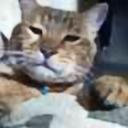

In [45]:
PIL.Image.open(path_gen.ls()[0])

Classification Report-Evaluation metrics

In [46]:
from sklearn.metrics import classification_report, accuracy_score
import torch

# Assuming you have a trained U-Net model
# Get the validation dataloader
val_dl = data_gen.fix_dl

true_labels = []
predictions = []

learn_gen.model.eval()
with torch.no_grad():
    for batch_idx, (images, masks) in enumerate(val_dl):
        preds = learn_gen.model(images)

        # If preds is a list, use the first element
        if isinstance(preds, list):
            preds = preds[0]

        # Convert predictions to class indices
        preds = torch.argmax(preds, dim=1)  # [batch_size, H, W]

        # Convert masks to class indices if one-hot encoded
        if len(masks.shape) == 4 and masks.shape[1] > 1:  # Check if one-hot encoded
            masks = torch.argmax(masks, dim=1)  # [batch_size, H, W]

        # Ensure consistent shapes
        if preds.shape != masks.shape:
            print(f"Shape mismatch at batch {batch_idx}: preds {preds.shape}, masks {masks.shape}")
            continue

        # Flatten and append
        true_labels.append(masks.flatten().cpu().numpy())
        predictions.append(preds.flatten().cpu().numpy())

# Concatenate and validate lengths
true_labels = np.concatenate(true_labels)
predictions = np.concatenate(predictions)

assert len(true_labels) == len(predictions), "Mismatch in true_labels and predictions lengths"

# Compute metrics
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(true_labels, predictions)
print("Classification Report:")
print(report)


Accuracy: 0.8816
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88  38712444
           1       0.79      0.75      0.77  14615142
           2       0.91      0.91      0.91  55642398

    accuracy                           0.88 108969984
   macro avg       0.86      0.85      0.85 108969984
weighted avg       0.88      0.88      0.88 108969984

